In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/CREDIT_DEFAULT_PROJECT/archive (2).zip"  #extraction
extract_path = "/content/drive/MyDrive/CREDIT_DEFAULT_PROJECT/CREDIT_DEFAULT_extracted" #directory

# extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# check
os.listdir(extract_path)



['Data Dictionary.xls', 'cs-test.csv', 'cs-training.csv', 'sampleEntry.csv']

In [2]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
extract_path = "/content/drive/MyDrive/CREDIT_DEFAULT_PROJECT/CREDIT_DEFAULT_extracted"

#CREDIT DEFAULT DATASET
This project is based on the Credit Default dataset available on Kaggle.
The goal is to predict which clients are likely to default on their payments.

We begin by introducing the dataset and conducting an exploratory data analysis to better understand the data and identify key patterns.

In [4]:
# ora il file è creato e si può visualizzare con pandas

import pandas as pd

csv_path = os.path.join(extract_path, 'cs-training.csv')
df = pd.read_csv(csv_path)

# Visualizza le prime righe
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Exploratory Analysis

The dataset consists of 150,000 rows and 12 features.
Below is a description of the variables included in the dataset:

- Unnamed: Useless column, possibly an index, will be dropped.
-SeriousDlqin2yrs: Target variable, indicates whether the person experienced 90 days past due delinquency in the past 2 years.
-RevolvingUtilizationOfUnsecuredLines: The ratio of the total balance on unsecured lines to the total credit limit. Represents the percentage of available credit being used.

- age: Age of the client (in years).
- NumberOfTime30-59DaysPastDueNotWorse: Number of times the client has been 30–59 days past due but not worse in the last 2 years.
-DebtRatio: Total monthly debt payments divided by monthly gross income.
-MonthlyIncome: Client’s monthly income.
-NumberOfOpenCreditLinesAndLoans: Total number of open credit lines and loans.
-NumberOfTimes90DaysLate: Number of times the client has been more than 90 days late on a payment.
-NumberRealEstateLoansOrLines: Number of mortgage and real estate loans or credit lines.
-NumberOfTime60-89DaysPastDueNotWorse: Number of times the client has been 60–89 days past due but not worse.
-NumberOfDependents: Number of dependents (e.g., children or others financially dependent on the client).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
df.shape

(150000, 12)

In [7]:
df.drop(columns="Unnamed: 0", inplace = True)

In [8]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


The dataset is not complete and contains some missing values.
Specifically, there are 29731 missing entries in the MonthlyIncome column and over 3000 missing values in the NumberOfDependents column.

In [12]:
df.isnull().sum().sort_values(ascending=False)

,0
MonthlyIncome,29731
NumberOfDependents,3924
SeriousDlqin2yrs,0
age,0
RevolvingUtilizationOfUnsecuredLines,0
DebtRatio,0
NumberOfTime30-59DaysPastDueNotWorse,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


### Know Your Costumer

#### Number of Dependents

For each value of NumberOfDependents, we analyze the average number of times a client has experienced a payment delay.

This allows us to observe whether having more dependents is associated with a higher average number of late payments.


In [13]:
df.groupby("NumberOfDependents").size() # check the size of each number of dependents

,0
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


In [14]:
df.groupby("NumberOfDependents")[["NumberOfTime30-59DaysPastDueNotWorse" , "NumberOfTime60-89DaysPastDueNotWorse" , "NumberOfTimes90DaysLate"]].mean()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfDependents,,,
0.0,0.423247,0.268038,0.291892
1.0,0.365405,0.156901,0.185553
2.0,0.413636,0.182307,0.205102
3.0,0.361489,0.126542,0.163239
4.0,0.442348,0.171209,0.205101
5.0,0.461126,0.231903,0.262735
6.0,0.341772,0.120253,0.139241
7.0,0.372549,0.156863,0.137255
8.0,0.166667,0.000000,0.166667


Using the table below, we can observe the percentage of clients with at least one late payment, grouped by the number of dependents. As shown the highest concentration of late payers appears among clients with 3, 4, or 5 dependents.


In [15]:
grouped_percentages = df.groupby("NumberOfDependents").agg({
    "NumberOfTime30-59DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTime60-89DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTimes90DaysLate": lambda x: (x > 0).mean(),

})
grouped_percentages

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfDependents,,,
0.0,0.141136,0.045304,0.050459
1.0,0.177611,0.053656,0.060952
2.0,0.198033,0.062340,0.061418
3.0,0.199620,0.063798,0.070020
4.0,0.231307,0.075821,0.079665
5.0,0.217158,0.081769,0.068365
6.0,0.221519,0.069620,0.082278
7.0,0.176471,0.098039,0.098039
8.0,0.125000,0.000000,0.083333


#### Age Distribution

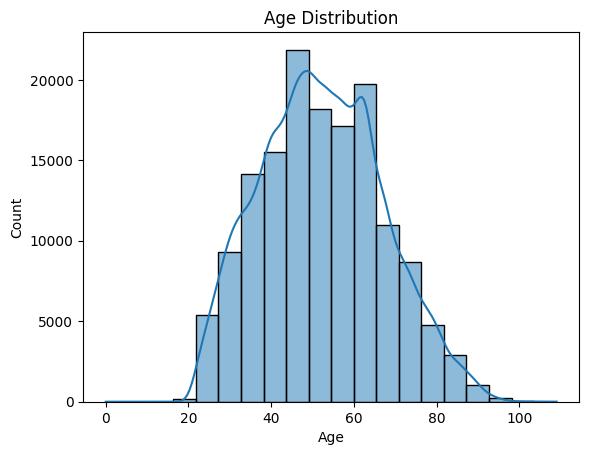

In [16]:
sns.histplot(df["age"], bins= 20, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [17]:
age_group = pd.cut(df["age"], bins=[18, 30, 45, 65, df["age"].max()], labels=["18-30", "31-45", "45-65", "65+"],right=True, include_lowest=True)
df.groupby(age_group).size()

<ipython-input-17-55ec0f511a5f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(age_group).size()


,0
age,
18-30,10757
31-45,40547
45-65,70096
65+,28599


In [18]:
age_group_perc =  df.groupby(age_group).agg({
    "NumberOfTime30-59DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTime60-89DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTimes90DaysLate": lambda x: (x > 0).mean(),
    "DebtRatio": "mean"

})

age_group_perc

<ipython-input-18-620c4f3761de>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_perc =  df.groupby(age_group).agg({


,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,DebtRatio
age,,,,
18-30,0.177559,0.083945,0.104304,96.744521
31-45,0.191506,0.065603,0.074827,292.213946
45-65,0.167955,0.048890,0.051016,445.798633
65+,0.088570,0.021469,0.021190,308.156938


When exploring the DebtRatio variable, we notice that it presents some issues.
In theory, this variable should range from 0 to 1, where:

- 0 indicates that the client has no debt relative to their income
- 1 means that the client uses 100% of their income to cover debt obligations

However, in the dataset we observe several values greater than 1, which suggests inconsistencies or possible data quality issues.


In [19]:
df["DebtRatio"].describe()

,DebtRatio
count,150000.000000
mean,353.005076
std,2037.818523
min,0.000000
25%,0.175074
50%,0.366508
75%,0.868254
max,329664.000000


In [20]:
df[df["DebtRatio"] >= 1.0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
14,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
16,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
25,1,0.392248,50,0,1.595253,4676.0,14,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.000627,76,0,60.000000,NaN,5,0,0,0,0.0
149977,0,0.236450,29,0,349.000000,NaN,3,0,0,0,0.0
149984,0,0.037548,84,0,25.000000,NaN,5,0,0,0,0.0
149992,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0


In [21]:
df[df["DebtRatio"]== 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1122,0,0.004104,55,1,1.0,0.0,5,0,0,1,0.0
1150,0,0.003158,32,0,1.0,NaN,1,0,0,0,0.0
1453,0,0.002524,89,0,1.0,NaN,6,0,0,0,0.0
1723,0,0.006922,68,0,1.0,NaN,9,0,0,0,0.0
2743,0,1.000000,24,0,1.0,NaN,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147760,0,0.003065,90,0,1.0,NaN,2,0,0,0,NaN
147954,0,0.058941,25,0,1.0,0.0,1,0,0,0,0.0
148270,0,0.002591,63,0,1.0,NaN,5,0,0,0,0.0
148454,0,1.000000,23,0,1.0,NaN,1,0,0,0,NaN


We found that there are more than 35000 unexpected values in the DebtRatio variable.
These anomalies are likely due to missing income values or data entry errors.
Since removing such a large portion of the data is not a viable option, we decided to cap the values at 1.
By doing so, all values exceeding this threshold are brought back into a consistent and valid range.

In [22]:
age_group_perc =  df.groupby(age_group).agg({
    "NumberOfTime30-59DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTime60-89DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTimes90DaysLate": lambda x: (x > 0).mean(),
    "DebtRatio": "median"

})

age_group_perc

<ipython-input-22-363e856bedaf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_perc =  df.groupby(age_group).agg({


,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,DebtRatio
age,,,,
18-30,0.177559,0.083945,0.104304,0.199112
31-45,0.191506,0.065603,0.074827,0.373588
45-65,0.167955,0.048890,0.051016,0.392263
65+,0.088570,0.021469,0.021190,0.325321


In [23]:
df["DebtRatio_capped"] = df["DebtRatio"].clip(upper=1.0)

In [24]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926


In [25]:
age_group_stat =  df.groupby(age_group).agg({
    "NumberOfTime30-59DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTime60-89DaysPastDueNotWorse": lambda x: (x > 0).mean(),
    "NumberOfTimes90DaysLate": lambda x: (x > 0).mean(),
    "DebtRatio_capped": "mean",
    "NumberOfOpenCreditLinesAndLoans": "mean"

})

age_group_stat.columns = [ "Perc_Late_30_59", "Perc_Late_60_89", "Perc_Late_90", "Avg_Debt_Ratio", "Avg_Loans"]
age_group_stat

<ipython-input-25-6457308619e3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stat =  df.groupby(age_group).agg({


,Perc_Late_30_59,Perc_Late_60_89,Perc_Late_90,Avg_Debt_Ratio,Avg_Loans
age,,,,,
18-30,0.177559,0.083945,0.104304,0.350780,4.706982
31-45,0.191506,0.065603,0.074827,0.458499,7.752016
45-65,0.167955,0.048890,0.051016,0.490845,9.428027
65+,0.088570,0.021469,0.021190,0.460581,8.464876


## Fetaure Problems

In this section, we address the issue of missing data in the dataset, specifically focusing on the `NumberOfDependents` and `MonthlyIncome ` features.





#### Numbers of Dependents

We fill the NaN values in the `NumberOfDependents` column with 0

In [26]:
# valore NaN sostituiti con 0
df["NumberOfDependents"].fillna(0, inplace = True)


<ipython-input-26-6eef8aee7aa2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NumberOfDependents"].fillna(0, inplace = True)


In [27]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926


In [28]:
df.isna().sum().sort_values(ascending=False)

,0
MonthlyIncome,29731
SeriousDlqin2yrs,0
age,0
RevolvingUtilizationOfUnsecuredLines,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


#### Monthly Income

For the `MonthlyIncome` variable, we applied a more sophisticated imputation strategy.
We introduced a new feature called AgeGroup, dividing the clients into four age brackets (18–30, 31–45, 46–65, 65+).

For each age group, we calculated the median monthly income and used that value to fill in the missing entries in the MonthlyIncome column.

Additionally, we identified one record where the `age` is equal to 0, which is clearly a data entry error.
After analyzing the data, we decided to replace this value with the mean age, which is 52.



In [29]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926


In [30]:
# aggiunta colonna age group per il merge con i gruppi eta divisi
df["AgeGroup"] = pd.cut(df["age"], bins = [18,30,45,65, df["age"].max()], labels=["18-30", "31-45", "45-65", "65+"],right=True, include_lowest=True)

In [31]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped,AgeGroup
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982,31-45
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876,31-45
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113,31-45
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050,18-30
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926,45-65


In [32]:
#creato dataframe per l'età mediana per fare merging

median_per_age = df.groupby(age_group)["MonthlyIncome"].median().reset_index()
median_per_age.columns = ["AgeGroup", "MedianMonthlyIncome"]
median_per_age


<ipython-input-32-cbc1b771e305>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_per_age = df.groupby(age_group)["MonthlyIncome"].median().reset_index()


,AgeGroup,MedianMonthlyIncome
0,18-30,2779.5
1,31-45,5245.5
2,45-65,6245.0
3,65+,4968.0


In [33]:
df_vecchio = df.copy()

In [34]:
# merge tra df originale e median per age , su age group
df = df.merge(median_per_age, on="AgeGroup", how="left")

In [35]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped,AgeGroup,MedianMonthlyIncome
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982,31-45,5245.5
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876,31-45,5245.5
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113,31-45,5245.5
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050,18-30,2779.5
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926,45-65,6245.0


In [36]:
# riempiti i valori NaN con le mediane per gruppi di età

df["MonthlyIncome"].fillna(df["MedianMonthlyIncome"], inplace=True)

<ipython-input-36-5f47c18f0a81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MonthlyIncome"].fillna(df["MedianMonthlyIncome"], inplace=True)


In [37]:
import numpy as np

df["MonthlyIncome_log"] = np.log1p(df["MonthlyIncome"])

In [38]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped,AgeGroup,MedianMonthlyIncome,MonthlyIncome_log
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982,31-45,5245.5,9.118335
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876,31-45,5245.5,7.863651
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113,31-45,5245.5,8.020599
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050,18-30,2779.5,8.101981
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926,45-65,6245.0,11.060196


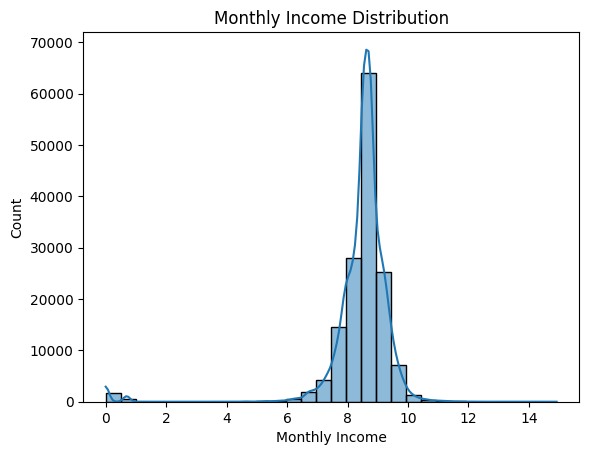

In [39]:
sns.histplot(df["MonthlyIncome_log"], bins = 30, kde= True)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

In [40]:
# controlliamo sia tutto a posto
df.isna().sum().sort_values(ascending = False)

,0
MedianMonthlyIncome,1
AgeGroup,1
SeriousDlqin2yrs,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfOpenCreditLinesAndLoans,0
MonthlyIncome,0
NumberOfTimes90DaysLate,0


In [41]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped,AgeGroup,MedianMonthlyIncome,MonthlyIncome_log
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.802982,31-45,5245.5,9.118335
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.121876,31-45,5245.5,7.863651
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.085113,31-45,5245.5,8.020599
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.036050,18-30,2779.5,8.101981
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.024926,45-65,6245.0,11.060196


In [44]:
# valore mancante da segnalare, age a zero quindi non presente age group
df[df.isna()["AgeGroup"]]


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped,AgeGroup,MedianMonthlyIncome,MonthlyIncome_log
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0.436927,NaN,NaN,8.699681


In [45]:
df.loc[65695]

,65695
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,1.0
age,0
NumberOfTime30-59DaysPastDueNotWorse,1
DebtRatio,0.436927
MonthlyIncome,6000.0
NumberOfOpenCreditLinesAndLoans,6
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,2
NumberOfTime60-89DaysPastDueNotWorse,0


In [46]:
age_mean = int(df["age"].mean())
age_mean

52

In [47]:
df.loc[65695, "age"] = age_mean
df.iloc[65695]

,65695
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,1.0
age,52
NumberOfTime30-59DaysPastDueNotWorse,1
DebtRatio,0.436927
MonthlyIncome,6000.0
NumberOfOpenCreditLinesAndLoans,6
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,2
NumberOfTime60-89DaysPastDueNotWorse,0


## Models

In this section, we aim to predict whether a client will default using three different models:

- Logistic Regression (used as a baseline)
- Random Forest
- XGBoost

We use the following features as covariates:

- `RevolvingUtilizationOfUnsecuredLines`
- `age`
- `NumberOfTime30-59DaysPastDueNotWorse`
- `NumberOfOpenCreditLinesAndLoans`
- `NumberOfTimes90DaysLate`
- `NumberRealEstateLoansOrLines`
- `NumberOfTime60-89DaysPastDueNotWorse	`
- `NumberOfDependents`
- `DebtRatio_capped`
- `MonthlyIncome_log`

The dataset is split into 80% training and 20% testing.
We evaluate model performance using two classification thresholds: the default 0.50 and a custom 0.40, to assess how the threshold affects the results.
The following evaluation metrics are used:
- ROC AUC
-PR AUC
- Precision
- Accuracy

Additionally, we display the confusion matrix for each model at both thresholds (0.4 and 0.5) to better understand classification outcomes.


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc)


In [49]:
X = df.drop(columns = ["SeriousDlqin2yrs", "DebtRatio", "AgeGroup", "MedianMonthlyIncome", "MonthlyIncome" ] )
y = df["SeriousDlqin2yrs"]

In [50]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_capped,MonthlyIncome_log
0,0.766127,45,2,13,0,6,0,2.0,0.802982,9.118335
1,0.957151,40,0,4,0,0,0,1.0,0.121876,7.863651
2,0.658180,38,1,2,1,0,0,0.0,0.085113,8.020599
3,0.233810,30,0,5,0,0,0,0.0,0.036050,8.101981
4,0.907239,49,1,7,0,1,0,0.0,0.024926,11.060196
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,4,0,1,0,0.0,0.225131,7.650169
149996,0.299745,44,0,4,0,1,0,2.0,0.716562,8.627840
149997,0.246044,58,0,18,0,1,0,0.0,1.000000,8.739697
149998,0.000000,30,0,4,0,0,0,0.0,0.000000,8.651199


In [51]:
y

,SeriousDlqin2yrs
0,1
1,0
2,0
3,0
4,0
...,...
149995,0
149996,0
149997,0
149998,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 12)

In [53]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((120000, 10), (30000, 10), (120000,), (30000,))

### Logistic Model

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc)

# Creazione del modello Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=12)
# addestramento modello su dati scaled
log_model.fit(X_train_scaled, y_train)

# Predizioni 0 non default, 1 default
y_pred_log = log_model.predict(X_test_scaled)
# probabilità di default (valore continuo 0-1 solo per default[:,1])
y_pred_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]




In [56]:
# Calcolo delle metriche
roc_auc_log = roc_auc_score(y_test, y_pred_prob_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Precision-Recall AUC
precision_points_log, recall_points_log, _ = precision_recall_curve(y_test, y_pred_prob_log)
pr_auc_log = auc(recall_points_log, precision_points_log)

# Tabella con le metriche
metrics_log_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Precision-Recall AUC'],
    'Value': [precision_log, recall_log, f1_log, roc_auc_log, pr_auc_log]
})

print("Metrics Logistic Regression:")
print(metrics_log_table)


Metrics Logistic Regression:
                 Metric     Value
0             Precision  0.601307
1                Recall  0.045885
2              F1 Score  0.085264
3               ROC AUC  0.683227
4  Precision-Recall AUC  0.230133


In [57]:
# cambio threshold per vedere se migliora
threshold = 0.4 # non migliora neanche con 0.1 troppa poca precision o con 0.7 troppa poca recall
# trasforma in true false se y pred prob maggiore del nuovo treshold. astype(int) per cambiare in 0 e 1
y_pred_custom_log = (y_pred_prob_log >= threshold).astype(int)

print("New Precision:", precision_score(y_test, y_pred_custom_log))
print("New Recall:", recall_score(y_test, y_pred_custom_log))
print("New F1 Score:", f1_score(y_test, y_pred_custom_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_log))

New Precision: 0.5478260869565217
New Recall: 0.0628428927680798
New F1 Score: 0.11275167785234899
ROC AUC: 0.683227268496022


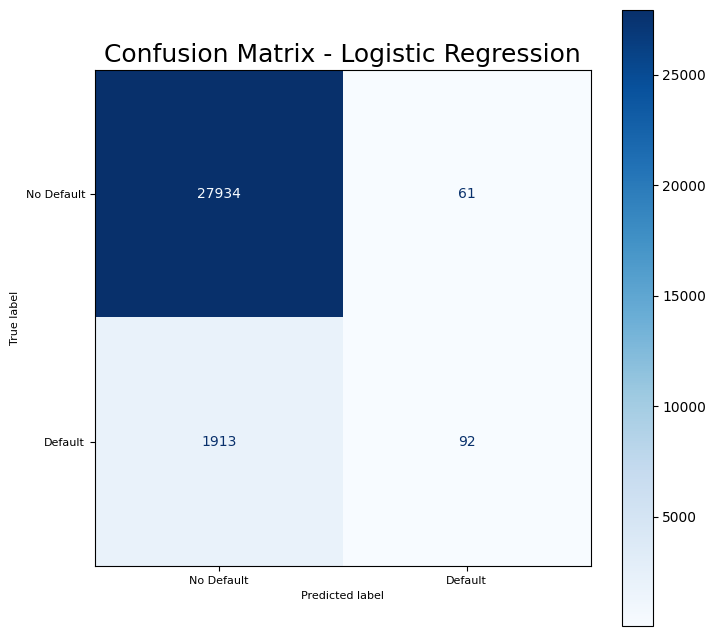

In [58]:

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['No Default', 'Default'])

fig, ax = plt.subplots(figsize=(8, 8))
disp_log.plot(cmap='Blues', values_format='d', ax=ax)

ax.set_title('Confusion Matrix - Logistic Regression', fontsize=18)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Predicted label', fontsize=8)
ax.set_ylabel('True label', fontsize=8)

plt.show()

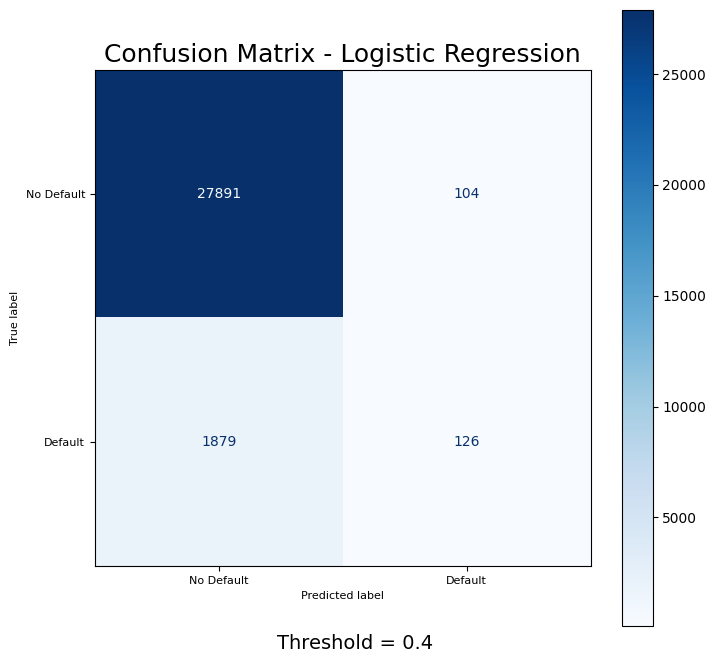

In [59]:

# Confusion Matrix
cm_log_t = confusion_matrix(y_test, y_pred_custom_log)
disp_log_t = ConfusionMatrixDisplay(confusion_matrix=cm_log_t, display_labels=['No Default', 'Default'])

fig, ax = plt.subplots(figsize=(8, 8))
disp_log_t.plot(cmap='Blues', values_format='d', ax=ax)

ax.set_title('Confusion Matrix - Logistic Regression', fontsize=18)
fig.suptitle('Threshold = 0.4', fontsize=14, y=0.1, x = 0.45) # for the subtitle

ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Predicted label', fontsize=8)
ax.set_ylabel('True label', fontsize=8)

plt.show()

### Tree-based Model

#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=400,     # numero di alberi
    max_depth=25,         # profondità massima degli alberi
    random_state=12,      # per riproducibilità
    n_jobs=-1             # usa tutti i core della CPU
)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [61]:
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_points_rf, recall_points_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
pr_auc_rf = auc(recall_points_rf, precision_points_rf)


metrics_rf_table = pd.DataFrame({
    "Metrics" : ["Precision", "Recall", "F1 Score", "ROC AUC", "Precision-Recall AUC"],
    "Value" : [precision_rf, recall_rf, f1_rf, roc_auc_rf, pr_auc_rf]
})

print("Metrics Random Forest:")
print(metrics_rf_table)


Metrics Random Forest:
                Metrics     Value
0             Precision  0.404669
1                Recall  0.414963
2              F1 Score  0.409751
3               ROC AUC  0.785657
4  Precision-Recall AUC  0.322457


In [62]:
threshold = 0.4
y_pred_custom_rf = (y_pred_prob_rf >= threshold).astype(int)

print("New Precision:", precision_score(y_test, y_pred_custom_rf))
print("New Recall:", recall_score(y_test, y_pred_custom_rf))
print("New F1 Score:", f1_score(y_test, y_pred_custom_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_rf))

New Precision: 0.23991628614916286
New Recall: 0.628927680798005
New F1 Score: 0.3473350778129734
ROC AUC: 0.7856567814256108


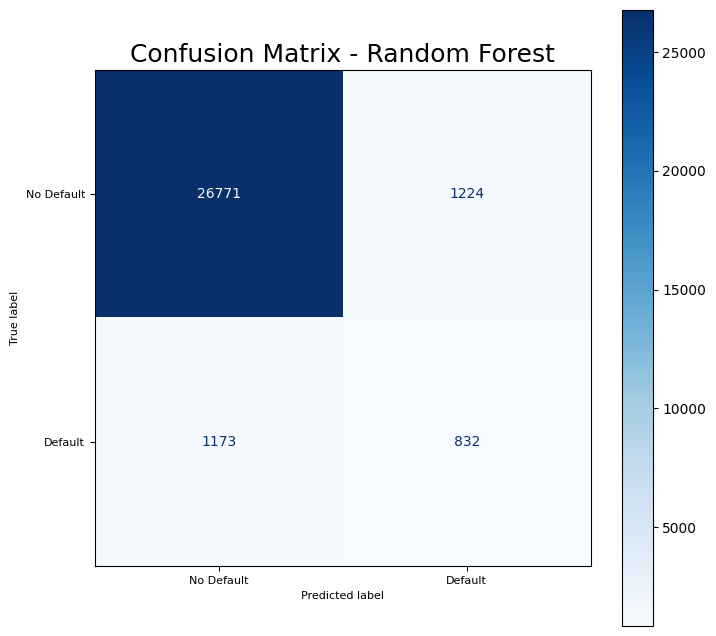

In [63]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Default', 'Default'])

fig, ax = plt.subplots(figsize=(8, 8))
disp_rf.plot(cmap='Blues', values_format='d', ax=ax)

ax.set_title('Confusion Matrix - Random Forest', fontsize=18)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Predicted label', fontsize=8)
ax.set_ylabel('True label', fontsize=8)

plt.show()

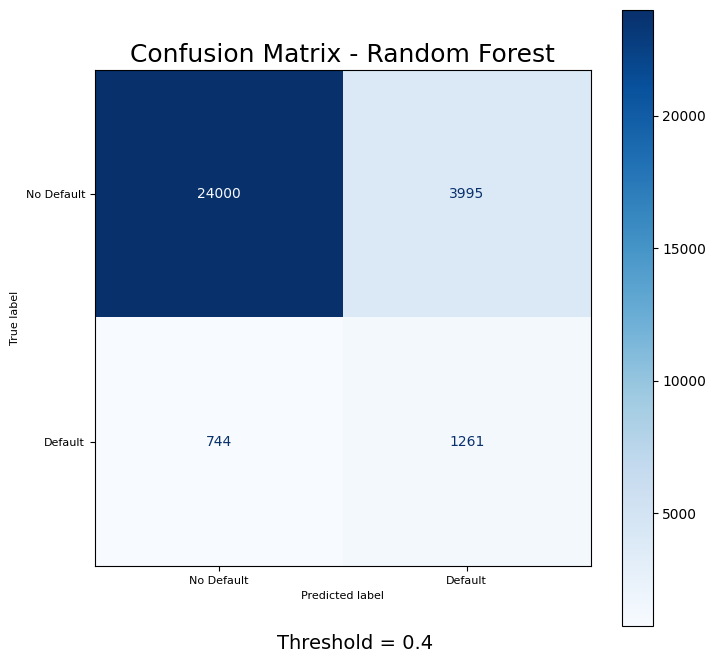

In [64]:
cm_rf_t = confusion_matrix(y_test, y_pred_custom_rf)
disp_rf_t = ConfusionMatrixDisplay(confusion_matrix = cm_rf_t, display_labels= ["No Default", "Default"])

fig, ax = plt.subplots(figsize = (8,8))
disp_rf_t.plot(cmap = "Blues", values_format="d", ax=ax)

ax.set_title("Confusion Matrix - Random Forest", fontsize = 18)
fig.suptitle('Threshold = 0.4', fontsize=14, y=0.1, x = 0.45)
ax.tick_params(axis = "both", labelsize = 8)
ax.set_xlabel("Predicted label", fontsize= 8)
ax.set_ylabel("True label", fontsize = 8)

plt.show()


#### XGBoost

In [65]:
pip install xgboost

In [66]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
     n_estimators=300,        # numero alberi
    max_depth=3,             # profondità
    learning_rate=0.01,       # tasso di apprendimento
    subsample=0.8,           # frazione di righe usate per ogni albero
    colsample_bytree=0.7,    # frazione di colonne usate
    use_label_encoder=False, # per evitare warning
    eval_metric="logloss",   # metrica di valutazione
    random_state=12
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [69]:
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_points_xgb, recall_points_xgb, _ = precision_recall_curve(y_test, y_pred_prob_xgb)
pr_auc_xgb = auc(recall_points_xgb, precision_points_xgb)

metrics_xgb_table = pd.DataFrame({

    "Metrics" : ["Precision", "Recall", "F1 Score", "ROC AUC", "Precision-Recall AUC"],
    "Value" : [precision_xgb, recall_xgb, f1_xgb,  roc_auc_xgb, pr_auc_xgb]
})

print("Metrics XGBoost:")
print(metrics_xgb_table)




Metrics XGBoost:
                Metrics     Value
0             Precision  0.646766
1                Recall  0.129676
2              F1 Score  0.216037
3               ROC AUC  0.862700
4  Precision-Recall AUC  0.403178


In [70]:
threshold = 0.4 # non migliora neanche con 0.1 troppa poca precision o con 0.7 troppa poca recall
# trasforma in true false se y pred prob maggiore del nuovo treshold. astype(int) per cambiare in 0 e 1
y_pred_custom_xgb = (y_pred_prob_xgb >= threshold).astype(int)

print("New Precision:", precision_score(y_test, y_pred_custom_xgb))
print("New Recall:", recall_score(y_test, y_pred_custom_xgb))
print("New F1 Score:", f1_score(y_test, y_pred_custom_xgb))

print("ROC AUC:",  roc_auc_score(y_test, y_pred_prob_xgb))


New Precision: 0.5787451984635084
New Recall: 0.2254364089775561
New F1 Score: 0.32447954055994255
ROC AUC: 0.8627000190183587


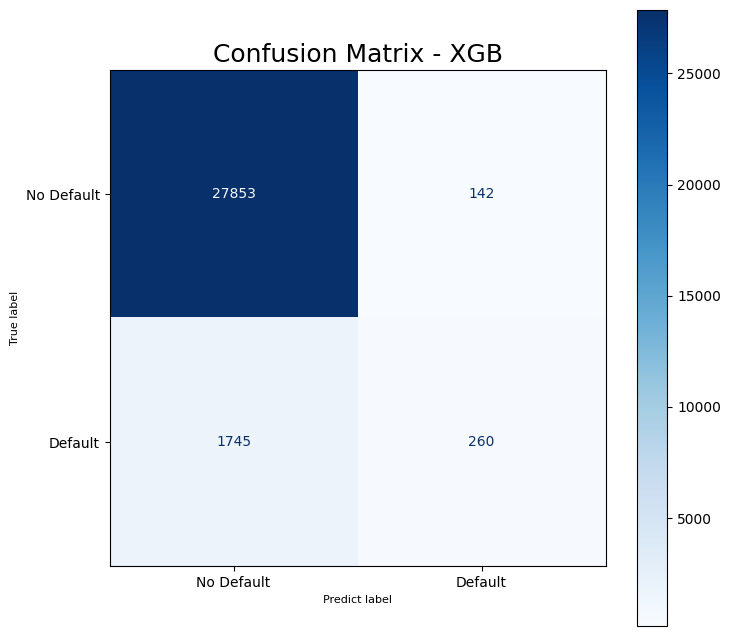

In [71]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ["No Default", "Default"])

fig, ax = plt.subplots(figsize = (8,8))
disp_xgb.plot(cmap= "Blues", values_format="d", ax=ax)

ax.set_title("Confusion Matrix - XGB", fontsize=18)

ax.set_xlabel("Predict label", fontsize =8 )
ax.set_ylabel("True label", fontsize =8)
plt.show()


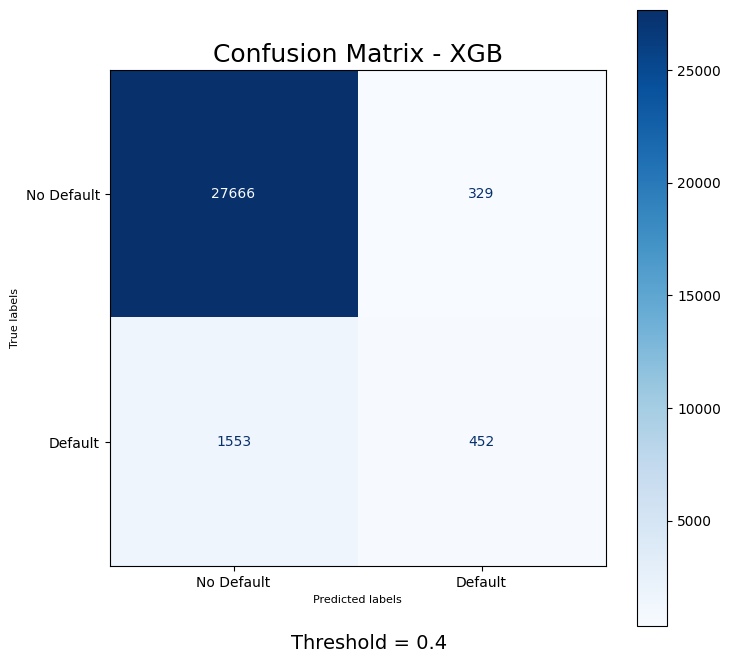

In [72]:
cm_xgb_t = confusion_matrix(y_test, y_pred_custom_xgb)
display_xgb_t = ConfusionMatrixDisplay(confusion_matrix = cm_xgb_t, display_labels = ["No Default", "Default"])

fig, ax = plt.subplots(figsize = (8,8))
display_xgb_t.plot(cmap = "Blues", values_format = "d", ax=ax)

ax.set_title("Confusion Matrix - XGB", fontsize = 18)
fig.suptitle("Threshold = 0.4", fontsize = 14, y = 0.1, x = 0.45)
ax.set_xlabel("Predicted labels", fontsize = 8)
ax.set_ylabel("True labels", fontsize=8)
plt.show()


## Feature Importance

In this section, we examine model interpretability by:

- Displaying the coefficients of the logistic regression model, to understand the direction and strength of the relationship between each feature and the probability of default.
- Showing the feature importance scores for the tree-based models (Random Forest and XGBoost), to identify which variables contribute most to the prediction.

In [73]:
coef_log = log_model.coef_[0]
feat_names = X_train.columns

feature_coef_log = pd.DataFrame(
    {
        "Feature": feat_names,
        "Coefficents": coef_log
    }
)
feature_coef_log.sort_values(by = "Coefficents", key = abs, ascending = False)



,Feature,Coefficents
6,NumberOfTime60-89DaysPastDueNotWorse,-4.078698
2,NumberOfTime30-59DaysPastDueNotWorse,2.191564
4,NumberOfTimes90DaysLate,2.054553
1,age,-0.443818
8,DebtRatio_capped,0.164164
7,NumberOfDependents,0.106085
3,NumberOfOpenCreditLinesAndLoans,-0.062581
9,MonthlyIncome_log,0.018731
0,RevolvingUtilizationOfUnsecuredLines,-0.011075
5,NumberRealEstateLoansOrLines,0.001716


In [74]:
coef_importance_rf = rf_model.feature_importances_



feature_importance_rf = pd.DataFrame(
    {
        "Feature": feat_names,
        "Importance": coef_importance_rf
    }
)
feature_importance_rf.sort_values(by = "Importance", key = abs, ascending= False)



,Feature,Importance
0,RevolvingUtilizationOfUnsecuredLines,0.201470
9,MonthlyIncome_log,0.150740
8,DebtRatio_capped,0.141705
1,age,0.131336
4,NumberOfTimes90DaysLate,0.095933
3,NumberOfOpenCreditLinesAndLoans,0.093571
2,NumberOfTime30-59DaysPastDueNotWorse,0.057144
6,NumberOfTime60-89DaysPastDueNotWorse,0.047148
7,NumberOfDependents,0.043442
5,NumberRealEstateLoansOrLines,0.037510


In [75]:
coef_importance_xgb = xgb_model.feature_importances_
feature_importance_xgb = pd.DataFrame({
    "Feature": feat_names,
    "Importance": coef_importance_xgb
})
feature_importance_xgb.sort_values(by="Importance", key=abs, ascending=False)

,Feature,Importance
4,NumberOfTimes90DaysLate,0.316543
0,RevolvingUtilizationOfUnsecuredLines,0.281362
2,NumberOfTime30-59DaysPastDueNotWorse,0.141326
6,NumberOfTime60-89DaysPastDueNotWorse,0.127458
1,age,0.043201
5,NumberRealEstateLoansOrLines,0.030111
3,NumberOfOpenCreditLinesAndLoans,0.024900
8,DebtRatio_capped,0.016271
9,MonthlyIncome_log,0.012580
7,NumberOfDependents,0.006249


## Cost per Model

Finally, we consider a cost-sensitive evaluation of the models.
We assume that misclassifying a good-paying customer as a defaulter (false positive) is less costly than failing to identify a true defaulter (false negative).
To reflect this, we assign the following costs:
- False Positive (FP): $1,000

- False Negative (FN): $10000

We compute the total cost for each model and for both classification thresholds (0.40 and 0.50), in order to better align the evaluation with real-world business priorities.

In [82]:
cost_fp = 1000 # $ Dollar lost good client(display as default but not default)
cost_fn = 10000 # $ Dollar lost bad client (display as not default but default)

In [83]:
# log cost
tn_log, fp_log, fn_log, tp_log = cm_log.ravel()
cost_log = (fp_log * cost_fp) + (fn_log * cost_fn)

# log cost threshold

tn_log_t , fp_log_t, fn_log_t, tp_log_t = cm_log_t.ravel()
cost_log_t = (fp_log_t * cost_fp) + (fn_log_t * cost_fn)

# rf cost

tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
cost_rf = (fp_rf * cost_fp) + (fn_rf * cost_fn)

# rf cost threshold
tn_rf_t, fp_rf_t, fn_rf_t, tp_rf_t = cm_rf_t.ravel()
cost_rf_t = (fp_rf_t * cost_fp) + (fn_rf_t * cost_fn)

# xgb cost
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
cost_xgb = (fp_xgb * cost_fp) + (fn_xgb * cost_fn)

# xgb cost threshold
tn_xgb_t, fp_xgb_t, fn_xgb_t, tp_xgb_t = cm_xgb_t.ravel()
cost_xgb_t = (fp_xgb_t * cost_fp) + (fn_xgb_t * cost_fn)

total_cost = pd.DataFrame(
    {
        "Models": [ "Logistic",  "Logistic Threshold" ,"Random Forest", "Random Forest Threshold", "XGB", "XGB Threshold"],
        "Cost":   [ cost_log, cost_log_t, cost_rf, cost_rf_t, cost_xgb, cost_xgb_t]
        }
)
total_cost.sort_values(by = "Cost", ascending = True)

,Models,Cost
3,Random Forest Threshold,11435000
2,Random Forest,12954000
5,XGB Threshold,15859000
4,XGB,17592000
1,Logistic Threshold,18894000
0,Logistic,19191000
